### Import Dataset 

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

In [ ]:
df = pd.read_csv('fraud_oracle.csv')
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


### Data Preparation

In [ ]:
### Cols to drop
drop_cols = ['RepNumber']
df.drop(columns=drop_cols,inplace=True)

In [ ]:
### Fixing the missing value 
df['MonthClaimed'][df['PolicyNumber']==1517] = 'Jul'
df['DayOfWeekClaimed'][df['PolicyNumber']==1517] = 'Monday'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [ ]:
df.shape

(15420, 32)

In [ ]:
##Cleaning whole dataset
X_object = df[df.columns[df.dtypes == 'object']]
X_numerical = df[df.columns[df.dtypes == 'int64']]

#Encode object type columns via ordinal encoding
temp = X_object
from sklearn.preprocessing import OrdinalEncoder

categories = []

for col in temp:
    list_value = [i for i in temp[col].value_counts().index]
    categories.append(list_value)

ordinal = OrdinalEncoder(categories = categories)

ordinal.fit_transform(temp)

temp = pd.DataFrame(columns = temp.columns, data = ordinal.fit_transform(temp))

# Concatenate the numerical and ordinal columns to get our final X
X = pd.concat([temp, X_numerical], axis = 1)   #axis =1 side by side 
X

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,NumberOfCars,BasePolicy,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,Deductible,DriverRating,Year
0,5.0,4.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,8.0,...,2.0,1.0,5,1,21,0,1,300,1,1994
1,0.0,4.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,...,0.0,0.0,3,4,34,0,2,400,4,1994
2,4.0,1.0,2.0,0.0,3.0,6.0,0.0,0.0,0.0,3.0,...,0.0,0.0,5,2,47,0,3,400,3,1994
3,3.0,5.0,1.0,1.0,4.0,9.0,0.0,0.0,1.0,1.0,...,0.0,1.0,2,1,65,0,4,400,2,1994
4,0.0,0.0,2.0,0.0,1.0,5.0,1.0,1.0,1.0,3.0,...,0.0,0.0,5,2,27,0,5,400,1,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,10.0,1.0,1.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4,5,35,1,15416,400,4,1996
15416,10.0,3.0,0.0,0.0,4.0,10.0,0.0,0.0,0.0,1.0,...,2.0,1.0,5,1,30,0,15417,400,3,1996
15417,10.0,3.0,1.0,1.0,4.0,10.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5,1,24,1,15418,400,4,1996
15418,5.0,0.0,1.0,0.0,3.0,10.0,1.0,0.0,1.0,2.0,...,0.0,2.0,1,2,34,0,15419,400,4,1996


In [ ]:
target_var = ['FraudFound_P']
y = df[target_var]
X.drop(columns = target_var[0], inplace=True)
X

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,AddressChange_Claim,NumberOfCars,BasePolicy,WeekOfMonth,WeekOfMonthClaimed,Age,PolicyNumber,Deductible,DriverRating,Year
0,5.0,4.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,8.0,...,3.0,2.0,1.0,5,1,21,1,300,1,1994
1,0.0,4.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,...,0.0,0.0,0.0,3,4,34,2,400,4,1994
2,4.0,1.0,2.0,0.0,3.0,6.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,5,2,47,3,400,3,1994
3,3.0,5.0,1.0,1.0,4.0,9.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,2,1,65,4,400,2,1994
4,0.0,0.0,2.0,0.0,1.0,5.0,1.0,1.0,1.0,3.0,...,0.0,0.0,0.0,5,2,27,5,400,1,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,10.0,1.0,1.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4,5,35,15416,400,4,1996
15416,10.0,3.0,0.0,0.0,4.0,10.0,0.0,0.0,0.0,1.0,...,0.0,2.0,1.0,5,1,30,15417,400,3,1996
15417,10.0,3.0,1.0,1.0,4.0,10.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,5,1,24,15418,400,4,1996
15418,5.0,0.0,1.0,0.0,3.0,10.0,1.0,0.0,1.0,2.0,...,0.0,0.0,2.0,1,2,34,15419,400,4,1996


In [ ]:
y = y.squeeze()

# Exploratory Data Analysis

In [ ]:
#We grouping the data into the following categories for easier visualisation/understanding
target_var = ['FraudFound_P']
date_accident = ['Month','WeekOfMonth','DayOfWeek','Year']
date_claimed = ['DayOfWeekClaimed','MonthClaimed','WeekOfMonthClaimed']
vehicle_det = ['Make','VehicleCategory','VehiclePrice','AgeOfVehicle']
accident_det = ['Fault','AccidentArea','PoliceReportFiled','WitnessPresent','NumberOfCars']
claimant_det = ['Sex','MaritalStatus','DriverRating','AgeOfPolicyHolder','PastNumberOfClaims','AddressChange_Claim']
policy_det = ['Deductible','PolicyType','Days_Policy_Accident','Days_Policy_Claim','AgentType','NumberOfSuppliments','BasePolicy','PolicyNumber']


#Consolidating the categories of variables
X_var = [date_accident, date_claimed, vehicle_det, accident_det, claimant_det, policy_det]
y_var = [target_var]
X_var_dic = {'date_accident':date_accident,
            'date_claimed':date_claimed,
            'vehicle_det':vehicle_det,
            'accident_det':accident_det,
            'claimant_det':claimant_det,
            'policy_det':policy_det}

### Target Variable

In [ ]:
#raw values
raw = df[target_var].value_counts()
raw.rename('actual values')

#percentages
perc = df[target_var].value_counts(normalize=True)*100
perc.rename('%')

# Concatenate the numerical and ordinal columns to get our final X
view = pd.concat([raw, perc], axis = 1) 
view.rename(columns = {0:'actual values', 1:'percentages'}, inplace = True)
view

,actual values,percentages
FraudFound_P,,
0,14497,94.014267
1,923,5.985733


In [ ]:
fraud = df[df["FraudFound_P"]==1]
fraud

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
52,Jul,3,Sunday,Honda,Rural,Wednesday,Jan,4,Male,Married,...,4 years,26 to 30,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
53,Jul,4,Saturday,Honda,Urban,Wednesday,Aug,2,Male,Married,...,more than 7,41 to 50,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
94,Nov,2,Thursday,Honda,Urban,Friday,Jan,3,Male,Single,...,7 years,31 to 35,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
96,Nov,2,Friday,Toyota,Urban,Tuesday,Jan,1,Male,Married,...,7 years,36 to 40,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15409,Nov,3,Friday,Mazda,Urban,Sunday,Nov,3,Female,Married,...,7 years,51 to 65,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15412,Nov,4,Tuesday,Pontiac,Urban,Wednesday,Nov,4,Female,Single,...,5 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,Liability
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision


### Date of Accident

In [ ]:
dic = {}


for col in date_accident:
    #raw values
    raw = df[col].value_counts()
    
    #percentages
    perc = df[col].value_counts(normalize=True)*100
    
    # Concatenate the numerical and ordinal columns to get our final X
    dic[col+' val'] = raw
    dic[col+' %'] = perc

pd.DataFrame.from_dict(dic, orient='index').T

,Month val,Month %,WeekOfMonth val,WeekOfMonth %,DayOfWeek val,DayOfWeek %,Year val,Year %
Jan,1411.0,9.150454,NaN,NaN,NaN,NaN,NaN,NaN
May,1367.0,8.865110,NaN,NaN,NaN,NaN,NaN,NaN
Mar,1360.0,8.819715,NaN,NaN,NaN,NaN,NaN,NaN
Jun,1321.0,8.566796,NaN,NaN,NaN,NaN,NaN,NaN
Oct,1305.0,8.463035,NaN,NaN,NaN,NaN,NaN,NaN
Dec,1285.0,8.333333,NaN,NaN,NaN,NaN,NaN,NaN
Apr,1280.0,8.300908,NaN,NaN,NaN,NaN,NaN,NaN
Feb,1266.0,8.210117,NaN,NaN,NaN,NaN,NaN,NaN
Jul,1257.0,8.151751,NaN,NaN,NaN,NaN,NaN,NaN
Sep,1240.0,8.041505,NaN,NaN,NaN,NaN,NaN,NaN


### Date of Claim

In [ ]:
dic = {}


for col in date_claimed:
    #raw values
    raw = df[col].value_counts()
    
    #percentages
    perc = df[col].value_counts(normalize=True)*100
    
    # Concatenate the numerical and ordinal columns to get our final X
    dic[col+' val'] = raw
    dic[col+' %'] = perc

pd.DataFrame.from_dict(dic, orient='index').T

,DayOfWeekClaimed val,DayOfWeekClaimed %,MonthClaimed val,MonthClaimed %,WeekOfMonthClaimed val,WeekOfMonthClaimed %
Monday,3758.0,24.370947,NaN,NaN,NaN,NaN
Tuesday,3375.0,21.887160,NaN,NaN,NaN,NaN
Wednesday,2951.0,19.137484,NaN,NaN,NaN,NaN
Thursday,2660.0,17.250324,NaN,NaN,NaN,NaN
Friday,2497.0,16.193256,NaN,NaN,NaN,NaN
Saturday,127.0,0.823606,NaN,NaN,NaN,NaN
Sunday,52.0,0.337224,NaN,NaN,NaN,NaN
Jan,NaN,NaN,1446.0,9.377432,NaN,NaN
May,NaN,NaN,1411.0,9.150454,NaN,NaN
Mar,NaN,NaN,1348.0,8.741894,NaN,NaN


In [ ]:
fraud_rate_weekclaim = df.groupby('DayOfWeekClaimed').agg({
    "FraudFound_P": "mean"
})
fraud_rate_weekclaim.columns = ['FraudRate']
fraud_rate_weekclaim = fraud_rate_weekclaim.apply(lambda x: round(x, 3))
fraud_rate_weekclaim.sort_values(by='FraudRate',ascending=False)

,FraudRate
DayOfWeekClaimed,
Saturday,0.079
Friday,0.066
Wednesday,0.064
Tuesday,0.059
Sunday,0.058
Monday,0.057
Thursday,0.054


### Vehicle Details

In [ ]:
dic = {}


for col in vehicle_det:
    #raw values
    raw = df[col].value_counts()
    
    #percentages
    perc = df[col].value_counts(normalize=True)*100
    
    # Concatenate the numerical and ordinal columns to get our final X
    dic[col+' val'] = raw
    dic[col+' %'] = perc

pd.DataFrame.from_dict(dic, orient='index').T

,Make val,Make %,VehicleCategory val,VehicleCategory %,VehiclePrice val,VehiclePrice %,AgeOfVehicle val,AgeOfVehicle %
Pontiac,3837.0,24.883268,NaN,NaN,NaN,NaN,NaN,NaN
Toyota,3121.0,20.239948,NaN,NaN,NaN,NaN,NaN,NaN
Honda,2801.0,18.164721,NaN,NaN,NaN,NaN,NaN,NaN
Mazda,2354.0,15.265888,NaN,NaN,NaN,NaN,NaN,NaN
Chevrolet,1681.0,10.901427,NaN,NaN,NaN,NaN,NaN,NaN
Accura,472.0,3.060960,NaN,NaN,NaN,NaN,NaN,NaN
Ford,450.0,2.918288,NaN,NaN,NaN,NaN,NaN,NaN
VW,283.0,1.835279,NaN,NaN,NaN,NaN,NaN,NaN
Dodge,109.0,0.706874,NaN,NaN,NaN,NaN,NaN,NaN
Saab,108.0,0.700389,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fraud_rate_make = df.groupby('Make').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_make.columns = ['FraudRate', '#']
fraud_rate_make = fraud_rate_make.apply(lambda x: round(x, 3))
fraud_rate_make.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
Make,,
Mecedes,0.250,4
Accura,0.125,472
Saturn,0.103,58
Saab,0.102,108
Ford,0.073,450
Mercury,0.072,83
BMW,0.067,15
Honda,0.064,2801
Toyota,0.060,3121


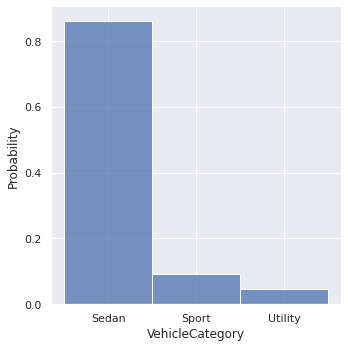

In [ ]:
sns.displot(x ='VehicleCategory', stat = "probability", data = fraud)
plt.show()

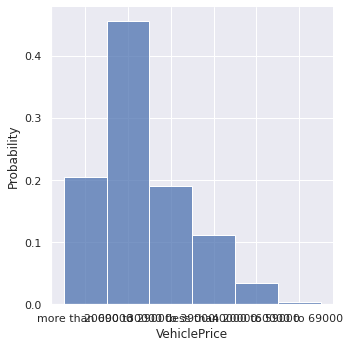

In [ ]:
sns.displot(x ='VehiclePrice', stat = "probability", data = fraud)
plt.show()

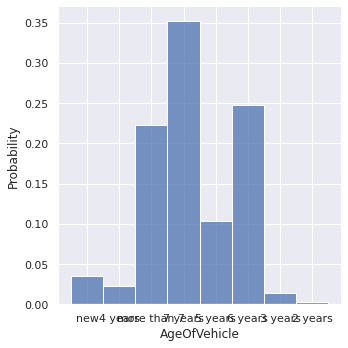

In [ ]:
sns.displot(x ='AgeOfVehicle', stat = "probability", data = fraud)
plt.show()

### Accident Details

In [ ]:
dic = {}


for col in accident_det:
    #raw values
    raw = df[col].value_counts()
    
    #percentages
    perc = df[col].value_counts(normalize=True)*100
    
    # Concatenate the numerical and ordinal columns to get our final X
    dic[col+' val'] = raw
    dic[col+' %'] = perc

pd.DataFrame.from_dict(dic, orient='index').T

,Fault val,Fault %,AccidentArea val,AccidentArea %,PoliceReportFiled val,PoliceReportFiled %,WitnessPresent val,WitnessPresent %,NumberOfCars val,NumberOfCars %
Policy Holder,11230.0,72.827497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Third Party,4190.0,27.172503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Urban,NaN,NaN,13822.0,89.636835,NaN,NaN,NaN,NaN,NaN,NaN
Rural,NaN,NaN,1598.0,10.363165,NaN,NaN,NaN,NaN,NaN,NaN
No,NaN,NaN,NaN,NaN,14992.0,97.224384,15333.0,99.435798,NaN,NaN
Yes,NaN,NaN,NaN,NaN,428.0,2.775616,87.0,0.564202,NaN,NaN
1 vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14316.0,92.840467
2 vehicles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,709.0,4.597925
3 to 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,372.0,2.412451
5 to 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,0.136187


In [ ]:
fraud_rate_rep_wit = df.groupby(['PoliceReportFiled', 'WitnessPresent']).agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_rep_wit.columns = ['FraudRate', '#']
fraud_rate_rep_wit = fraud_rate_rep_wit.apply(lambda x: round(x, 3))
fraud_rate_rep_wit.sort_values(by='FraudRate',ascending=False)

FraudRate      #
PoliceReportFiled WitnessPresent                  
No                No                  0.061  14945
                  Yes                 0.043     47
Yes               No                  0.039    388
                  Yes                 0.025     40

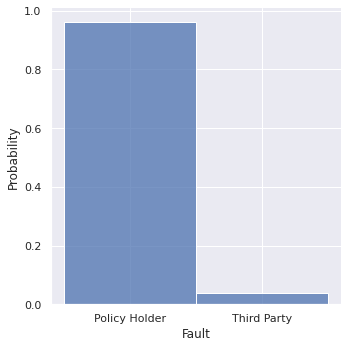

In [ ]:
sns.displot(x ='Fault', stat = "probability", data = fraud)
plt.show()

### Claimant Details

In [ ]:
dic = {}


for col in claimant_det:
    #raw values
    raw = df[col].value_counts()
    
    #percentages
    perc = df[col].value_counts(normalize=True)*100
    
    # Concatenate the numerical and ordinal columns to get our final X
    dic[col+' val'] = raw
    dic[col+' %'] = perc

view = pd.DataFrame.from_dict(dic, orient='index').T
display(view)

,Sex val,Sex %,MaritalStatus val,MaritalStatus %,DriverRating val,DriverRating %,AgeOfPolicyHolder val,AgeOfPolicyHolder %,PastNumberOfClaims val,PastNumberOfClaims %,AddressChange_Claim val,AddressChange_Claim %
Male,13000.0,84.306096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Female,2420.0,15.693904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,NaN,NaN,10625.0,68.904021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Single,NaN,NaN,4684.0,30.376135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Divorced,NaN,NaN,76.0,0.492866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Widow,NaN,NaN,35.0,0.226978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,3944.0,25.577173,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,3884.0,25.188067,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,3801.0,24.649805,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,3791.0,24.584955,NaN,NaN,NaN,NaN,NaN,NaN


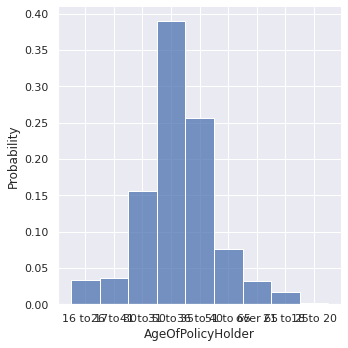

In [ ]:
sns.displot(x ='AgeOfPolicyHolder', stat = "probability", data = fraud)
plt.show()

### Policy Details

In [ ]:
dic = {}


for col in policy_det:
    #raw values
    raw = df[col].value_counts()
    
    #percentages
    perc = df[col].value_counts(normalize=True)*100
    
    # Concatenate the numerical and ordinal columns to get our final X
    dic[col+' val'] = raw
    dic[col+' %'] = perc

view = pd.DataFrame.from_dict(dic, orient='index').T
view

,Deductible val,Deductible %,PolicyNumber val,PolicyNumber %,PolicyType val,PolicyType %,Days_Policy_Accident val,Days_Policy_Accident %,Days_Policy_Claim val,Days_Policy_Claim %,NumberOfSuppliments val,NumberOfSuppliments %,AgentType val,AgentType %,BasePolicy val,BasePolicy %
400,14838.0,96.225681,1.0,0.006485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
700,311.0,2.016861,1.0,0.006485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,263.0,1.705577,1.0,0.006485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,8.0,0.051881,1.0,0.006485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sedan - Collision,NaN,NaN,NaN,NaN,5584.0,36.212711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,NaN,NaN,1.0,0.006485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5146,NaN,NaN,1.0,0.006485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5147,NaN,NaN,1.0,0.006485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5148,NaN,NaN,1.0,0.006485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fraud_rate_pt = df.groupby('PolicyType').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_pt.columns = ['FraudRate', '#']
fraud_rate_pt = fraud_rate_pt.apply(lambda x: round(x, 3))
fraud_rate_pt.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
PolicyType,,
Sport - Collision,0.138,348
Utility - All Perils,0.121,340
Sedan - All Perils,0.101,4087
Utility - Collision,0.100,30
Sedan - Collision,0.069,5584
Sedan - Liability,0.007,4987
Sport - All Perils,0.000,22
Sport - Liability,0.000,1
Utility - Liability,0.000,21


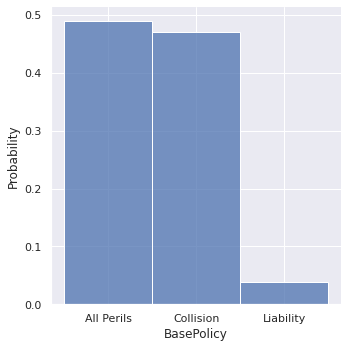

In [ ]:
sns.displot(x ='BasePolicy', stat = "probability", data = fraud)
plt.show()

# Train-Test Split and K-Fold CV

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=22, stratify = y) # <- stratify by y

In [ ]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (12336, 31)
Number transactions y_train dataset:  (12336,)
Number transactions X_test dataset:  (3084, 31)
Number transactions y_test dataset:  (3084,)


In [ ]:
print("counts of label '1': {}".format(sum(y_train == 1)))
print("counts of label '0': {} \n".format(sum(y_train == 0)))

counts of label '1': 738
counts of label '0': 11598 



In [ ]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 22)

# Models

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTEN
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_validate
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold

### Linear SVC

In [ ]:
from imblearn.combine import SMOTEENN
from imblearn.pipeline import make_pipeline

linear = make_pipeline(StandardScaler(), SMOTEENN(random_state=42), SVC(kernel = 'linear', C = 1)) 

results = cross_validate(linear,X_train, y_train,  scoring = ['precision', 'recall', 'f1', 'balanced_accuracy'], cv = cv, return_estimator = True)

pd.DataFrame(results).round(decimals=4)

,fit_time,score_time,estimator,test_precision,test_recall,test_f1,test_balanced_accuracy
0,56.3456,0.7369,"(StandardScaler(), SMOTEENN(random_state=42), ...",0.1154,0.8986,0.2045,0.7295
1,49.4013,0.7376,"(StandardScaler(), SMOTEENN(random_state=42), ...",0.1177,0.9320,0.2090,0.7447
2,38.5306,0.7013,"(StandardScaler(), SMOTEENN(random_state=42), ...",0.1126,0.8912,0.2000,0.7232
3,74.8591,0.7111,"(StandardScaler(), SMOTEENN(random_state=42), ...",0.1221,0.9662,0.2168,0.7615
4,31.7243,0.7194,"(StandardScaler(), SMOTEENN(random_state=42), ...",0.1167,0.9595,0.2081,0.7479


### XGBoost

In [ ]:
#takes about 14 min 
from imblearn.combine import SMOTEENN
from imblearn.pipeline import make_pipeline

xg_random_grid = {"n_estimators": np.arange(10,1000,50),
                  "max_depth": [None, 3, 5, 10],
                  "min_samples_split": np.arange(2, 20, 2),
                  "min_samples_leaf": np.arange(1, 20, 2)} 


grid = make_pipeline(SMOTEENN(random_state=42),
                     RandomizedSearchCV(XGBClassifier(),
                           param_distributions=xg_random_grid,
                           cv=cv,
                           verbose=True,
                           n_iter=10,
                           refit = True))

grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 

Pipeline(steps=[('smoteenn', SMOTEENN(random_state=42)),
                ('randomizedsearchcv',
                 RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=22, shuffle=True),
                                    estimator=XGBClassifier(),
                                    param_distributions={'max_depth': [None, 3,
                                                                       5, 10],
                                                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                                    verbose=True))])

In [ ]:
grid[1].best_params_

{'n_estimators': 910,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 5}

In [ ]:
from imblearn.combine import SMOTEENN
from imblearn.pipeline import make_pipeline

#n_estimators = 910, min_samples_split = 10, min_samples_leaf = 11, max_depth = 5

xg_best = make_pipeline(SMOTEENN(random_state=42),  XGBClassifier(n_estimators = 910, min_samples_split = 16, min_samples_leaf = 3, max_depth = 5))

results = cross_validate(xg_best,X_train, y_train,  scoring = ['precision', 'recall', 'f1', 'balanced_accuracy'], cv = cv, return_estimator = True)

pd.DataFrame(results).round(decimals=4)

,fit_time,score_time,estimator,test_precision,test_recall,test_f1,test_balanced_accuracy
0,28.8773,0.1221,"(SMOTEENN(random_state=42), XGBClassifier(max_...",0.2130,0.2432,0.2271,0.5930
1,37.8413,0.1245,"(SMOTEENN(random_state=42), XGBClassifier(max_...",0.1940,0.1769,0.1851,0.5652
2,28.8551,0.1276,"(SMOTEENN(random_state=42), XGBClassifier(max_...",0.2517,0.2449,0.2483,0.5994
3,30.2072,0.1218,"(SMOTEENN(random_state=42), XGBClassifier(max_...",0.2115,0.2230,0.2171,0.5850
4,28.9799,0.1218,"(SMOTEENN(random_state=42), XGBClassifier(max_...",0.1942,0.1824,0.1882,0.5671


can just choose one xgboost model i put the randomized search in the pipeline one above, and the search outside of the pipeline one below

In [ ]:
#takes about 9 min to run 
smoteenn = SMOTEENN(random_state=42)
X_asmoteenn, y_smoteenn = smoteenn.fit_resample(X_train, y_train)

xg_random_grid = {"n_estimators": np.arange(10,1000,50),
                  "max_depth": [None, 3, 5, 10],
                  "min_samples_split": np.arange(2, 20, 2),
                  "min_samples_leaf": np.arange(1, 20, 2)} 

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold

xg_rs = RandomizedSearchCV(XGBClassifier(),
                           param_distributions=xg_random_grid,
                           cv=cv,
                           verbose=True,
                           n_iter=10)


xg_rs.fit(X_asmoteenn, y_smoteenn)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=22, shuffle=True),
                   estimator=XGBClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
xg_best = make_pipeline(SMOTEENN(random_state=42), XGBClassifier(n_estimators = 910, min_samples_split = 10, min_samples_leaf = 11, max_depth = 5))

results = cross_validate(xg_best,X_train, y_train,  scoring = ['precision', 'recall', 'f1', 'balanced_accuracy'], cv = cv, return_estimator = True)

pd.DataFrame(results).round(decimals=4)

,fit_time,score_time,estimator,test_precision,test_recall,test_f1,test_balanced_accuracy
0,38.1828,0.1196,"(SMOTEENN(random_state=42), XGBClassifier(max_...",0.2289,0.2568,0.2420,0.6008
1,29.3905,0.1211,"(SMOTEENN(random_state=42), XGBClassifier(max_...",0.2069,0.2041,0.2055,0.5773
2,30.9243,0.1320,"(SMOTEENN(random_state=42), XGBClassifier(max_...",0.2568,0.2585,0.2576,0.6055
3,33.5101,0.1210,"(SMOTEENN(random_state=42), XGBClassifier(max_...",0.1975,0.2162,0.2065,0.5801
4,31.3671,0.1187,"(SMOTEENN(random_state=42), XGBClassifier(max_...",0.1752,0.1622,0.1684,0.5567


In [ ]:
smoteenn = SMOTEENN(random_state=42)
X_asmoteenn, y_smoteenn = smoteenn.fit_resample(X_train, y_train)

xg_best = XGBClassifier(n_estimators = 910, min_samples_split = 10, min_samples_leaf = 11, max_depth = 5)
xg_best.fit(X_asmoteenn, y_smoteenn)

XGBClassifier(max_depth=5, min_samples_leaf=11, min_samples_split=10,
              n_estimators=910)

In [ ]:
from imblearn.combine import SMOTEENN
from imblearn.pipeline import make_pipeline

xg_best = make_pipeline(SMOTEENN(random_state=42), XGBClassifier(n_estimators = 810, min_samples_split = 16, min_samples_leaf = 13, max_depth = 5))

results = cross_validate(xg_best,X_train, y_train,  scoring = ['precision', 'recall', 'f1', 'balanced_accuracy'], cv = cv, return_estimator = True)

pd.DataFrame(results).round(decimals=4)

,fit_time,score_time,estimator,test_precision,test_recall,test_f1,test_balanced_accuracy
0,25.0663,0.1130,"(SMOTEENN(random_state=42), XGBClassifier(max_...",0.5677,0.5946,0.5809,0.7829
1,24.6659,0.1118,"(SMOTEENN(random_state=42), XGBClassifier(max_...",0.5612,0.5306,0.5455,0.7522
2,27.0335,0.1149,"(SMOTEENN(random_state=42), XGBClassifier(max_...",0.4966,0.4898,0.4932,0.7292
3,26.0783,0.1117,"(SMOTEENN(random_state=42), XGBClassifier(max_...",0.5643,0.5338,0.5486,0.7537
4,25.7099,0.1148,"(SMOTEENN(random_state=42), XGBClassifier(max_...",0.5379,0.4797,0.5071,0.7267


In [ ]:
smoteenn = SMOTEENN(random_state=42)
X_asmoteenn, y_smoteenn = smoteenn.fit_resample(X_train, y_train)
xg_best = XGBClassifier(n_estimators = 810, min_samples_split = 16, min_samples_leaf = 13, max_depth = 5)
xg_best.fit(X_asmoteenn, y_smoteenn)

XGBClassifier(max_depth=5, min_samples_leaf=13, min_samples_split=16,
              n_estimators=810)

In [ ]:
xgboost_feature_importance = pd.Series(xg_best.feature_importances_, index = xg_best.get_booster().feature_names).sort_values(ascending = False)
xgboost_feature_importance = pd.DataFrame(xgboost_feature_importance).reset_index()
xgboost_feature_importance.columns = ["Variable", "Importance"]
xgboost_feature_importance

,Variable,Importance
0,Fault,0.238484
1,VehicleCategory,0.177947
2,PolicyType,0.102944
3,MaritalStatus,0.071679
4,Sex,0.064534
5,VehiclePrice,0.059175
6,BasePolicy,0.049621
7,AccidentArea,0.038886
8,PastNumberOfClaims,0.037375
9,AgeOfVehicle,0.031086


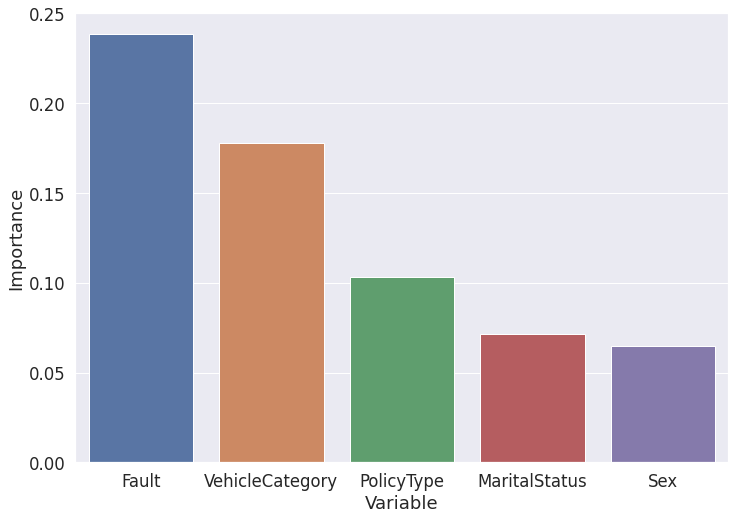

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)
sns.barplot(data=xgboost_feature_importance[0:5], x = 'Variable' , y = 'Importance')

### Balanced Random Forest

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold

rf_random_grid = {"n_estimators": np.arange(10,1000,50),
                  "max_depth": [None, 3, 5, 10],
                  "min_samples_split": np.arange(2, 20, 2),
                  "min_samples_leaf": np.arange(1, 20, 2)}

In [ ]:
rf_rs = RandomizedSearchCV(BalancedRandomForestClassifier(class_weight = 'balanced_subsample'),
                           param_distributions=rf_random_grid,
                           cv=cv,
                           verbose=True,
                           n_iter=10)

rf_rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=22, shuffle=True),
                   estimator=BalancedRandomForestClassifier(class_weight='balanced_subsample'),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rf_rs.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_depth': 10}

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators = 110, min_samples_split = 6, min_samples_leaf = 9, max_depth = 3, class_weight = 'balanced_subsample')
results = cross_validate(brf,X_train, y_train,  scoring = ['precision', 'recall', 'f1', 'balanced_accuracy'], cv = cv, return_estimator = True)

pd.DataFrame(results).round(decimals=4)

,fit_time,score_time,estimator,test_precision,test_recall,test_f1,test_balanced_accuracy
0,0.6641,0.0404,"(DecisionTreeClassifier(max_depth=3, max_featu...",0.1256,0.9459,0.2217,0.7628
1,0.6647,0.0395,"(DecisionTreeClassifier(max_depth=3, max_featu...",0.1270,0.9320,0.2235,0.7630
2,0.6718,0.0404,"(DecisionTreeClassifier(max_depth=3, max_featu...",0.1201,0.9184,0.2124,0.7460
3,0.6571,0.0511,"(DecisionTreeClassifier(max_depth=3, max_featu...",0.1248,0.9189,0.2197,0.7538
4,1.0948,0.0422,"(DecisionTreeClassifier(max_depth=3, max_featu...",0.1269,0.9527,0.2240,0.7672


In [ ]:
brf.fit(X_train, y_train)
brf_feature_importance = pd.Series(brf.feature_importances_, index = brf.feature_names_in_).sort_values(ascending = False)
brf_feature_importance = pd.DataFrame(brf_feature_importance).reset_index()
brf_feature_importance.columns = ["Variable", "Importance"]
brf_feature_importance

,Variable,Importance
0,VehicleCategory,0.211305
1,Fault,0.204043
2,PolicyType,0.186511
3,BasePolicy,0.121041
4,VehiclePrice,0.034237
5,PolicyNumber,0.032059
6,Age,0.024951
7,Deductible,0.024395
8,AddressChange_Claim,0.021650
9,Month,0.019089


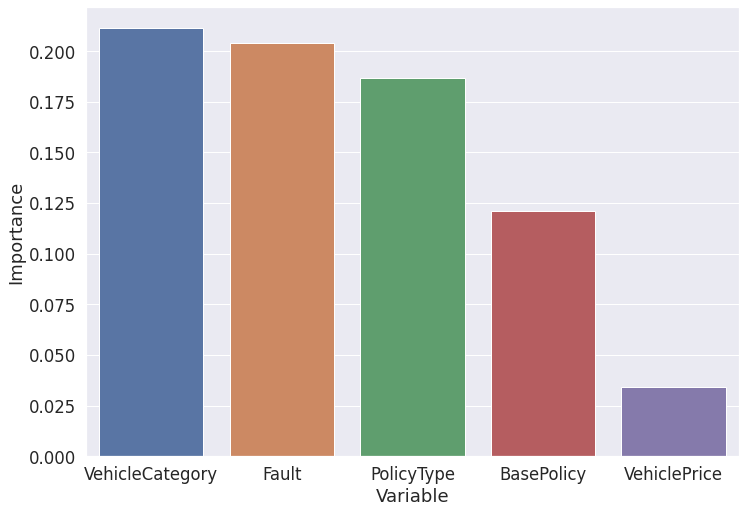

In [ ]:
#sns.set(rc={'figure.figsize':(12.7,8.27)})
#sns.set(font_scale=1.5)
sns.barplot(data=brf_feature_importance[0:5], x = 'Variable' , y = 'Importance')

# Test Results

### Linear SVC

In [ ]:
smoteenn = SMOTEENN(random_state=42)
X_asmoteenn, y_smoteenn = smoteenn.fit_resample(X_train, y_train)

In [ ]:
from imblearn.combine import SMOTEENN
from imblearn.pipeline import make_pipeline

linear = make_pipeline(StandardScaler(), SMOTEENN(random_state=42), SVC(kernel = 'linear', C = 1)) 

linear.fit(X_asmoteenn, y_smoteenn)

y_pred = linear.predict(X_test)

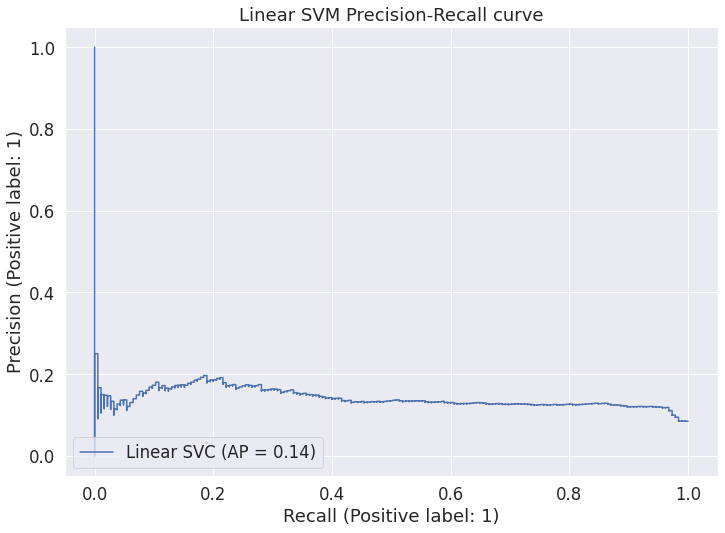

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)
display = PrecisionRecallDisplay.from_estimator(
    linear, X_test, y_test, name="Linear SVC"
)
_ = display.ax_.set_title("Linear SVM Precision-Recall curve")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels = [True, False]))

              precision    recall  f1-score   support

        True       0.12      0.89      0.22       185
       False       0.99      0.60      0.74      2899

    accuracy                           0.61      3084
   macro avg       0.56      0.74      0.48      3084
weighted avg       0.94      0.61      0.71      3084



### XGBoost

In [ ]:
smoteenn = SMOTEENN(random_state=42)
X_asmoteenn, y_smoteenn = smoteenn.fit_resample(X_train, y_train)

In [ ]:
xg_best = make_pipeline(SMOTEENN(random_state=42), XGBClassifier(n_estimators = 810, min_samples_split = 16, min_samples_leaf = 13, max_depth = 5))

xg_best.fit(X_asmoteenn, y_smoteenn)

y_pred = xg_best.predict(X_test)

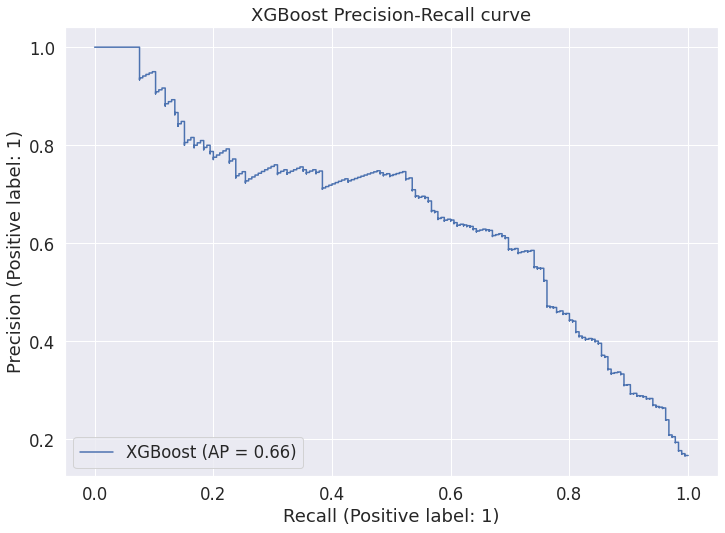

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    xg_best, X_test, y_test, name="XGBoost"
)
_ = display.ax_.set_title("XGBoost Precision-Recall curve")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels = [True, False]))

              precision    recall  f1-score   support

        True       0.62      0.67      0.65       185
       False       0.98      0.97      0.98      2899

    accuracy                           0.96      3084
   macro avg       0.80      0.82      0.81      3084
weighted avg       0.96      0.96      0.96      3084



### Balanced Random Forest

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(n_estimators = 110, min_samples_split = 6, min_samples_leaf = 9, max_depth = 3, class_weight = 'balanced_subsample')

brf.fit(X_train, y_train)

y_pred = brf.predict(X_test)

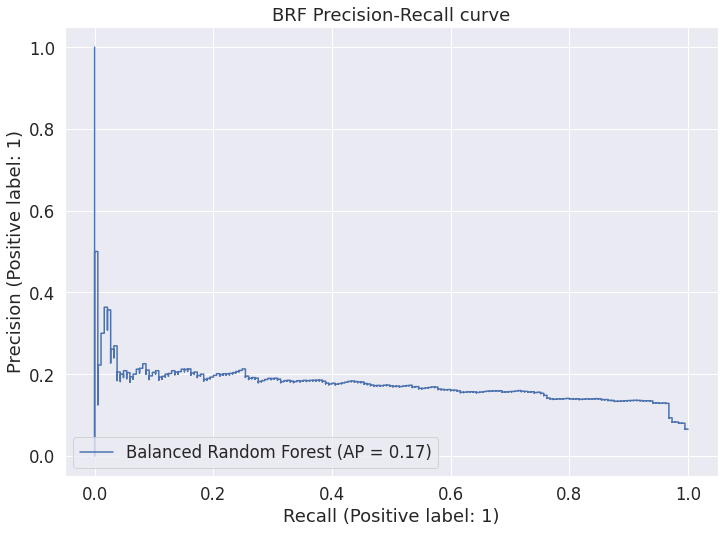

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    brf, X_test, y_test, name="Balanced Random Forest"
)
_ = display.ax_.set_title("BRF Precision-Recall curve")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels = [True, False]))

              precision    recall  f1-score   support

        True       0.13      0.95      0.23       185
       False       0.99      0.59      0.74      2899

    accuracy                           0.61      3084
   macro avg       0.56      0.77      0.49      3084
weighted avg       0.94      0.61      0.71      3084



# Curves

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

### Profit Curves

Cost Benefit Matrix

In [ ]:
import numpy as np

cost_benefit_matrix = np.array([[-375, -8125], [-575, -125]])
cost_benefit_matrix

array([[ -375, -8125],
       [ -575,  -125]])

Linear SVM

In [ ]:
y_scores = linear.decision_function(X_test)

In [ ]:
from sklearn.metrics import roc_curve
fpr, linear_tpr, thresholds = roc_curve(y_test, y_scores)

In [ ]:
len(thresholds)

315

Text(0, 0.5, 'Expected Value')

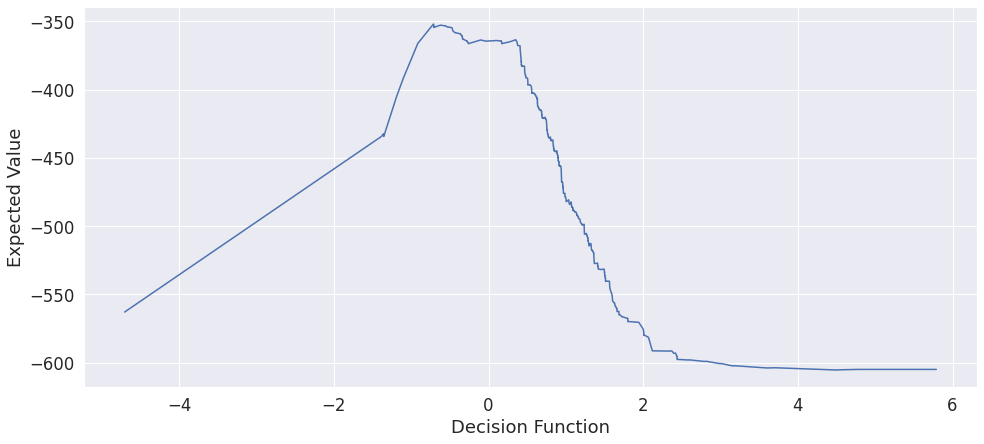

In [ ]:
from sklearn.metrics import confusion_matrix

expected_values = []
for t in thresholds:
    # Compute predictions at that threshold
    y_pred = [1 if score > t else 0 for score in y_scores]
    
    # Compute confusion matrix for those predictions
    mat = confusion_matrix(y_test, y_pred, labels = [True, False], normalize = 'all')
    
    # Calculate expected value
    expected_value = (mat * cost_benefit_matrix).sum()
    
    # Add to our list
    expected_values.append(expected_value)

plt.figure(figsize=(16,7))
plt.plot(thresholds, expected_values)
plt.xlabel('Decision Function')
plt.ylabel('Expected Value')

Text(0, 0.5, 'Expected Value')

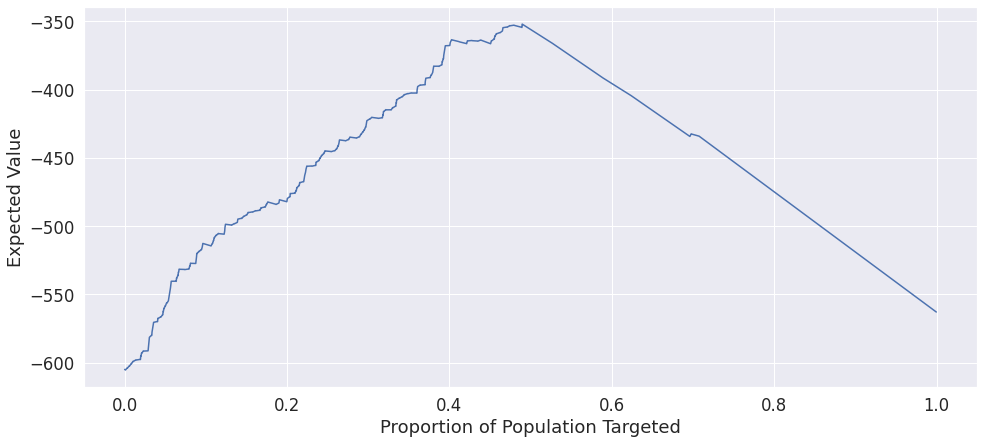

In [ ]:
number_targeted = np.array([(y_scores > t).sum() for t in thresholds])
percent_targeted_linear = number_targeted/len(y_scores)
expected_values_linear = expected_values

plt.figure(figsize=(16,7))
plt.plot(percent_targeted_linear, expected_values_linear)
plt.xlabel('Proportion of Population Targeted')
plt.ylabel('Expected Value')

Text(0, 0.5, 'Proportion of Positives Targeted')

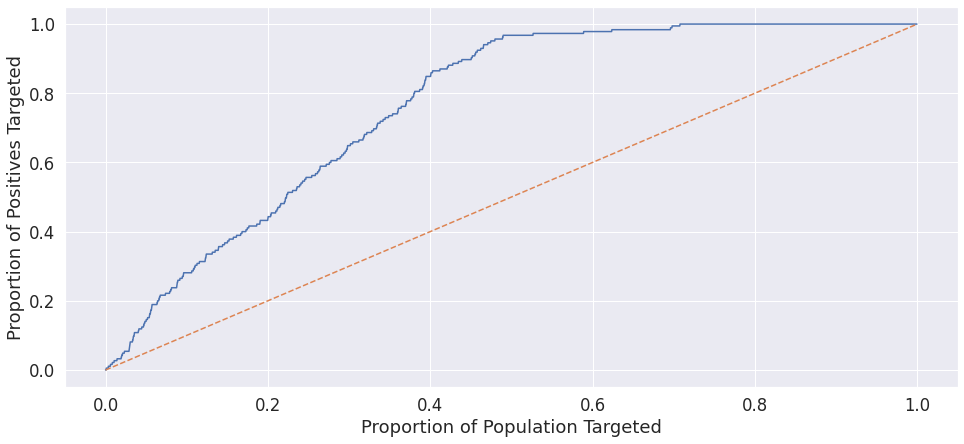

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(percent_targeted_linear, linear_tpr)
plt.plot([0,1], [0,1], linestyle = 'dashed')
plt.xlabel('Proportion of Population Targeted')
plt.ylabel('Proportion of Positives Targeted')

XGBoost

In [ ]:
y_scores = xg_best.predict_proba(X_test)

In [ ]:
xg_best.classes_

array([0, 1])

In [ ]:
y_scores = y_scores[:,1]

In [ ]:
from sklearn.metrics import roc_curve
fpr, xgboost_tpr, thresholds = roc_curve(y_test, y_scores)

Text(0, 0.5, 'Expected Value')

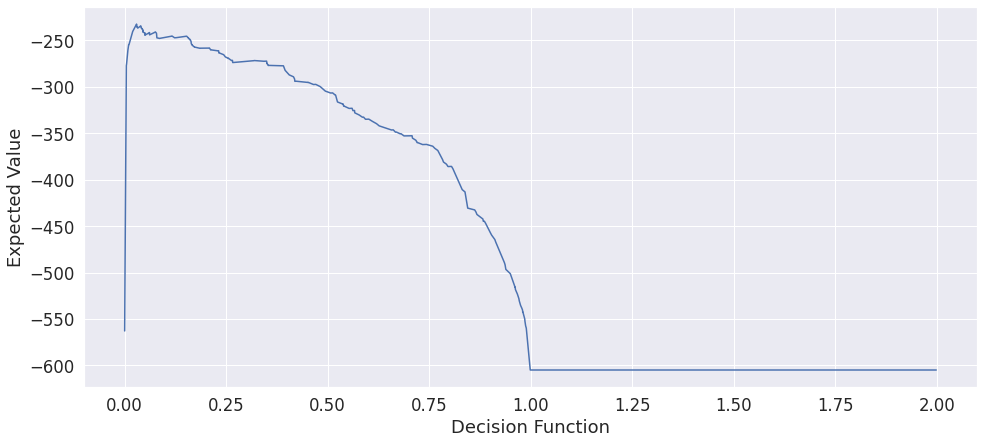

In [ ]:
from sklearn.metrics import confusion_matrix

expected_values = []
for t in thresholds:
    # Compute predictions at that threshold
    y_pred = [1 if score > t else 0 for score in y_scores]
    
    # Compute confusion matrix for those predictions
    mat = confusion_matrix(y_test, y_pred, labels = [True, False], normalize = 'all')
    
    # Calculate expected value
    expected_value = (mat * cost_benefit_matrix).sum()
    
    # Add to our list
    expected_values.append(expected_value)

plt.figure(figsize=(16,7))
plt.plot(thresholds, expected_values)
plt.xlabel('Decision Function')
plt.ylabel('Expected Value')

Text(0, 0.5, 'Expected Value')

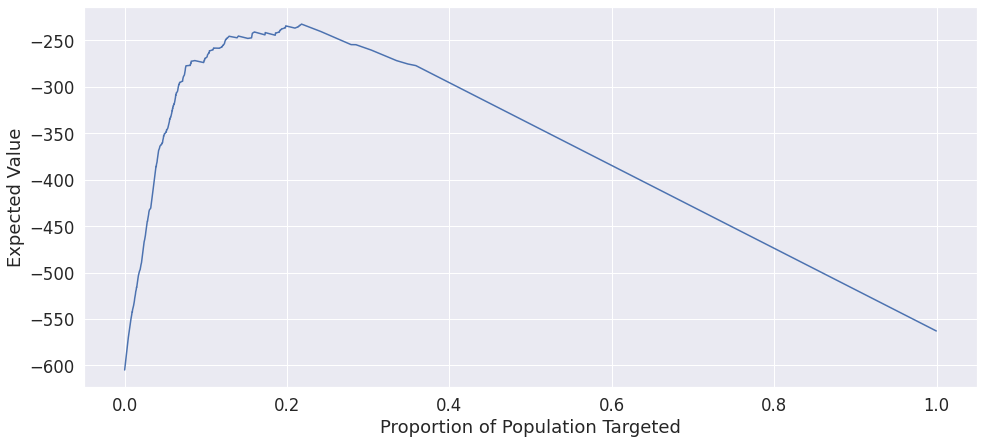

In [ ]:
number_targeted = np.array([(y_scores > t).sum() for t in thresholds])
percent_targeted_xg = number_targeted/len(y_scores)
expected_values_xg = expected_values

plt.figure(figsize=(16,7))
plt.plot(percent_targeted_xg, expected_values_xg)
plt.xlabel('Proportion of Population Targeted')
plt.ylabel('Expected Value')

Text(0, 0.5, 'Proportion of Positives Targeted')

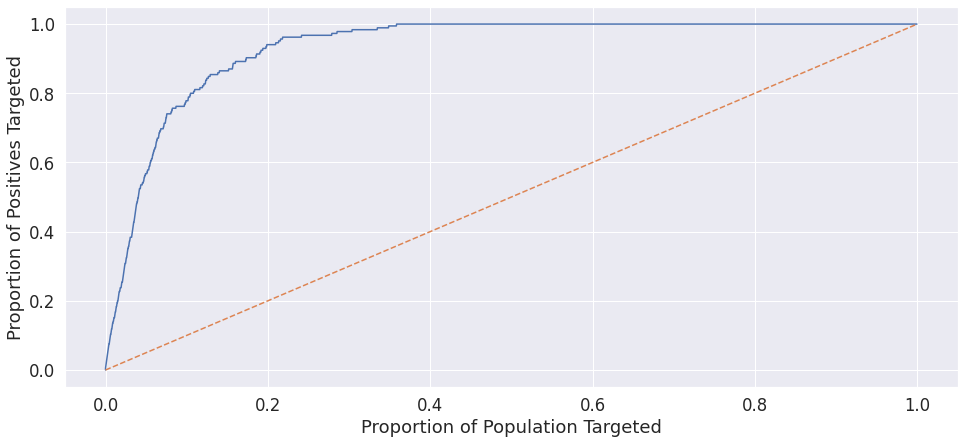

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(percent_targeted_xg, xgboost_tpr)
plt.plot([0,1], [0,1], linestyle = 'dashed')
plt.xlabel('Proportion of Population Targeted')
plt.ylabel('Proportion of Positives Targeted')

Balanced Random Forest

In [ ]:
y_scores = brf.predict_proba(X_test)

In [ ]:
brf.classes_

array([0, 1])

In [ ]:
y_scores = y_scores[:,1]

In [ ]:
from sklearn.metrics import roc_curve
fpr, brf_tpr, thresholds = roc_curve(y_test, y_scores)

Text(0, 0.5, 'Expected Value')

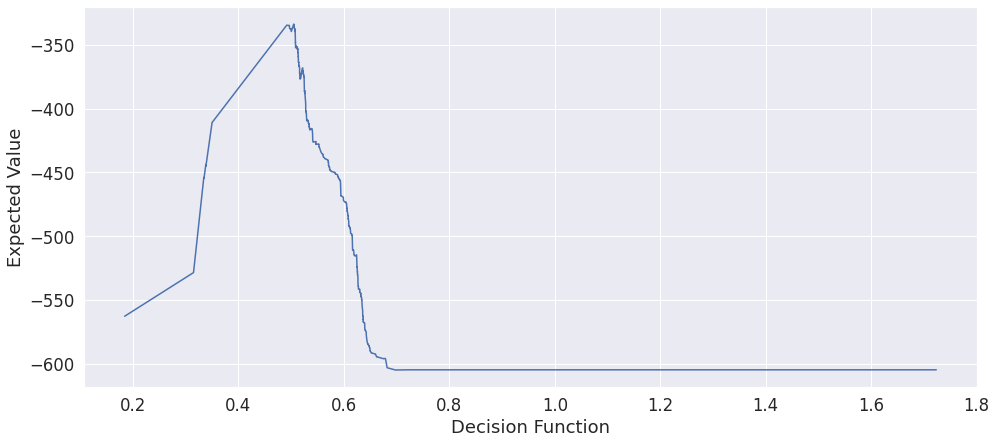

In [ ]:
from sklearn.metrics import confusion_matrix

expected_values = []
for t in thresholds:
    # Compute predictions at that threshold
    y_pred = [1 if score > t else 0 for score in y_scores]
    
    # Compute confusion matrix for those predictions
    mat = confusion_matrix(y_test, y_pred, labels = [True, False], normalize = 'all')
    
    # Calculate expected value
    expected_value = (mat * cost_benefit_matrix).sum()
    
    # Add to our list
    expected_values.append(expected_value)

plt.figure(figsize=(16,7))
plt.plot(thresholds, expected_values)
plt.xlabel('Decision Function')
plt.ylabel('Expected Value')

Text(0, 0.5, 'Expected Value')

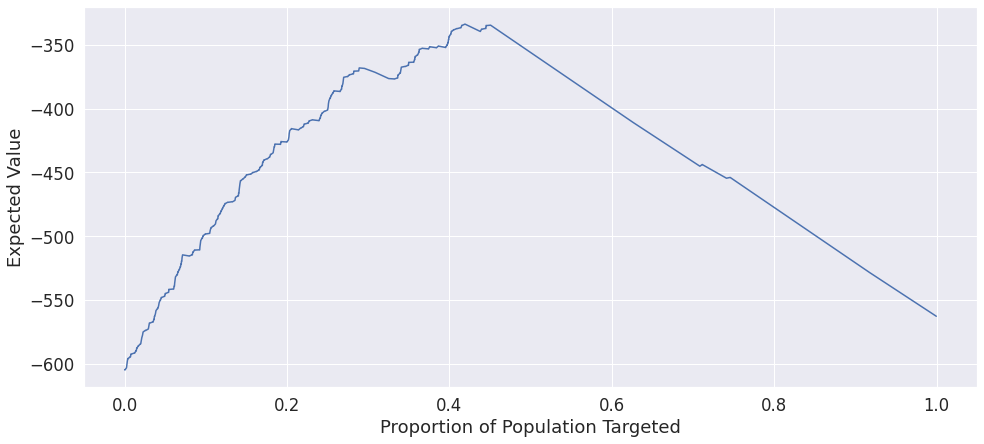

In [ ]:
number_targeted = np.array([(y_scores > t).sum() for t in thresholds])
percent_targeted_brf = number_targeted/len(y_scores)
expected_values_brf = expected_values

plt.figure(figsize=(16,7))
plt.plot(percent_targeted_brf, expected_values_brf)
plt.xlabel('Proportion of Population Targeted')
plt.ylabel('Expected Value')

Text(0, 0.5, 'Proportion of Positives Targeted')

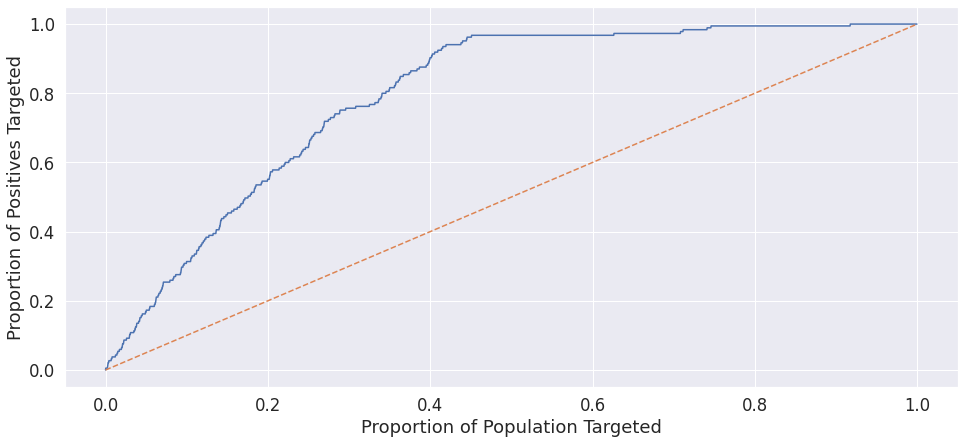

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(percent_targeted_brf, brf_tpr)
plt.plot([0,1], [0,1], linestyle = 'dashed')
plt.xlabel('Proportion of Population Targeted')
plt.ylabel('Proportion of Positives Targeted')

Plotting together

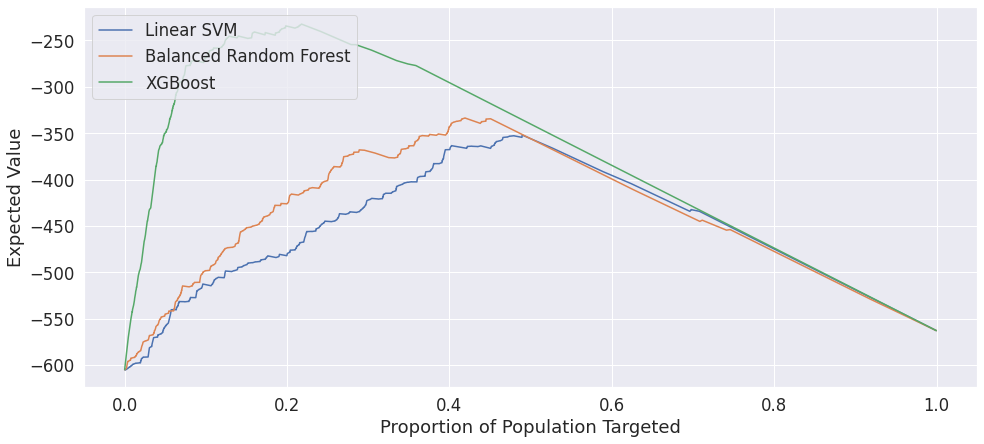

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(percent_targeted_linear, expected_values_linear, label='Linear SVM')
plt.plot(percent_targeted_brf, expected_values_brf, label='Balanced Random Forest')
plt.plot(percent_targeted_xg, expected_values_xg, label = 'XGBoost')
plt.xlabel('Proportion of Population Targeted')
plt.ylabel('Expected Value')
plt.legend(loc="upper left")

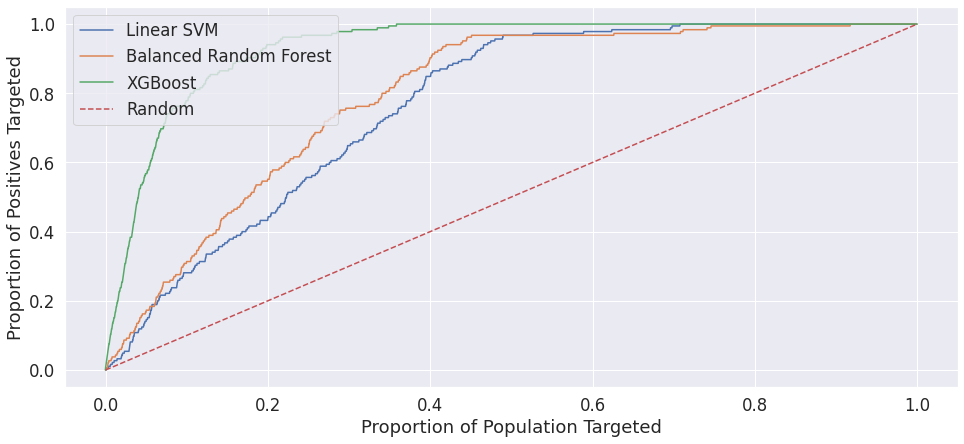

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(percent_targeted_linear, linear_tpr, label='Linear SVM')
plt.plot(percent_targeted_brf, brf_tpr, label='Balanced Random Forest')
plt.plot(percent_targeted_xg, xgboost_tpr, label = 'XGBoost')
plt.plot([0,1], [0,1], linestyle = 'dashed', label = 'Random')
plt.xlabel('Proportion of Population Targeted')
plt.ylabel('Proportion of Positives Targeted')
plt.legend(loc="upper left")